<a href="https://colab.research.google.com/github/tanmayb104/NLP-with-Disaster-Tweets/blob/main/NLP_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Read Dataset**

In [3]:
train = pd.read_csv('sample_data/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test = pd.read_csv('sample_data/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

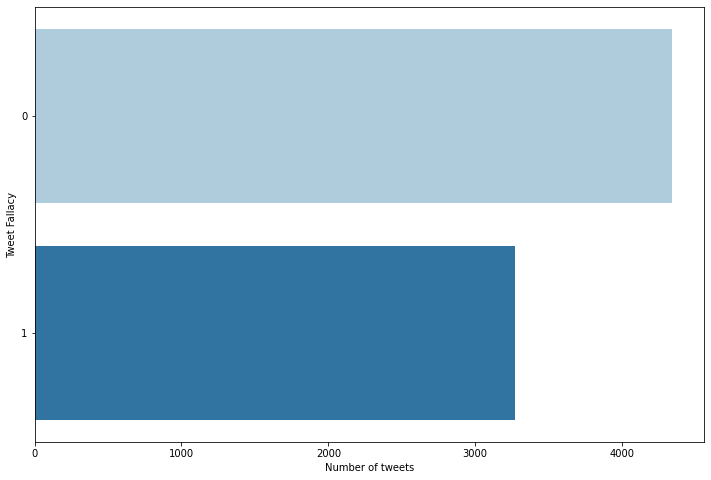

In [11]:
#Visualizing class distribution 
plt.figure(figsize=(12,8))
sns.countplot(y='target',data = train,palette="Paired")
plt.ylabel("Tweet Fallacy")
plt.xlabel("Number of tweets")
plt.show()

**Clean the dataset**

In [12]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

In [21]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
  
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [22]:
corpus = []
for i in range(len(train)):
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_punct(text)
    text = re.sub('[^a-zA-Z]', ' ', train['text'][i])
    text = text.lower()
    text = text.split()
    text = [wordnet.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [23]:
corpus1 = []
for i in range(len(test)):
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_punct(text)
    text1 = re.sub('[^a-zA-Z]', ' ', test['text'][i])
    text1 = text1.lower()
    text1 = text1.split()
    text1 = [wordnet.lemmatize(word) for word in text1 if word not in set(stopwords.words('english'))]
    text1 = ' '.join(text1)
    corpus1.append(text1)

**Bag Of Words**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(train['target'])
y = y.iloc[:, 1].values

cv = CountVectorizer(max_features=2500)
test_x = cv.fit_transform(corpus1).toarray()

**Tf-Idf**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=2500)
X1 = cv.fit_transform(corpus).toarray()

y1 = pd.get_dummies(train['target'])
y1 = y1.iloc[:, 1].values

cv = TfidfVectorizer(max_features=2500)
test_x1 = cv.fit_transform(corpus1).toarray()

**Confusion matrix and accuracy**

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def calculate(y_test,y_pred):
  confusion_m = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  print(confusion_m)
  print(accuracy)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X1, y1)

y_pred = spam_detect_model.predict(test_x1)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticR = LogisticRegression()
logisticR.fit(X1, y1)

y_pred = logisticR.predict(test_x1)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X1, y1)

y_pred = rfc.predict(test_x1)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

**Make submission file**

In [28]:
def convert(y_pred,name):
  data={"id":test["id"].tolist(),"target":y_pred}
  df = pd.DataFrame(data)
  df.to_csv(f"{name}.csv",index=False)

**Word Embeddings**

In [29]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import LSTM

In [30]:
a=set()
for i in corpus:
  for j in i.split():
    a.add(j)
for i in corpus1:
  for j in i.split():
    a.add(j)
print(len(a))


26781


In [31]:
vocab_size = 50000
encoded_docs = [one_hot(d, vocab_size) for d in corpus]
encoded_docs[:10]

[[15577, 1811, 27837, 37304, 36393, 36375, 2844],
 [38692, 5049, 14818, 4346, 23758, 41632, 37644],
 [19435, 4541, 32019, 49523, 24534, 35940, 25501, 32019, 49523, 22699, 13150],
 [4355, 14388, 4695, 25501, 22699, 6052],
 [49104, 42772, 17700, 49762, 24660, 41574, 4695, 1547, 26449],
 [32129,
  39312,
  6052,
  33168,
  1575,
  13709,
  17964,
  17362,
  49597,
  5049,
  4258,
  4695],
 [32292,
  17495,
  35192,
  35783,
  25006,
  4669,
  17715,
  26036,
  3384,
  32313,
  38497,
  25119],
 [7316, 22249, 45232, 5049, 44435],
 [1604, 25501, 5898, 4401, 12753, 26036],
 [38433, 3371, 25522, 25119]]

In [32]:
encoded_docs1 = [one_hot(d, vocab_size) for d in corpus1]
encoded_docs1[:10]

[[29285, 13205, 15715, 39253],
 [11154, 27837, 8374, 17293, 35275, 21510, 44914],
 [38692, 5049, 18954, 38901, 34883, 37380, 12753, 26036, 2821, 28952],
 [7454, 42655, 43976, 4695],
 [47109, 37872, 21414, 49417, 21926],
 [6131, 27837],
 [7279, 47465, 45334, 23220, 46932, 20888, 44354, 44354],
 [27277],
 [48966, 36364],
 [5888]]

In [33]:
# pad documents to a max length
max_length = 0
for i in encoded_docs:
  max_length = max(max_length,len(i))
for i in encoded_docs1:
  max_length = max(max_length,len(i))
print(max_length)

27


In [34]:
max_length = 30
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='pre')
print(padded_docs)

[[    0     0     0 ... 36393 36375  2844]
 [    0     0     0 ... 23758 41632 37644]
 [    0     0     0 ... 49523 22699 13150]
 ...
 [    0     0     0 ...  6601  2246 23584]
 [    0     0     0 ... 23220 31648 12965]
 [    0     0     0 ...  6601 10369 26742]]


In [35]:
padded_docs1 = pad_sequences(encoded_docs1, maxlen=max_length, padding='pre')
print(padded_docs1)

[[    0     0     0 ... 13205 15715 39253]
 [    0     0     0 ... 35275 21510 44914]
 [    0     0     0 ... 26036  2821 28952]
 ...
 [    0     0     0 ... 24206  6601 43550]
 [    0     0     0 ...  6601   152 32379]
 [    0     0     0 ...  1604  9324 15506]]


In [39]:
# define the model
embedding_vector_features = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=max_length))
# model.add(Flatten())
# model.add(Dropout(0.1))
model.add(LSTM(1000))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           5000000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              4404000   
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 9,405,001
Trainable params: 9,405,001
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25)

In [41]:
# fit the model
# model.fit(padded_docs, y, epochs=2, verbose=1)

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2)

Epoch 1/2
179/179 [==============================] - 268s 1s/step - loss: 0.5576 - accuracy: 0.7017 - val_loss: 0.4755 - val_accuracy: 0.7784
Epoch 2/2
179/179 [==============================] - 267s 1s/step - loss: 0.2887 - accuracy: 0.8902 - val_loss: 0.5455 - val_accuracy: 0.7742


In [42]:
import numpy
y_pred=model.predict(X_test)
final_y_pred=[]
for i in range(len(y_pred)):
  final_y_pred.append(int(numpy.round(y_pred[i])))
final_y_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,final_y_pred)


array([[972, 133],
       [297, 502]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_y_pred)

0.7741596638655462

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1105
           1       0.79      0.63      0.70       799

    accuracy                           0.77      1904
   macro avg       0.78      0.75      0.76      1904
weighted avg       0.78      0.77      0.77      1904



In [46]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 91.186130


In [47]:
ans = model.predict(padded_docs1)
ans

array([[0.5612432 ],
       [0.7212032 ],
       [0.9126911 ],
       ...,
       [0.92790544],
       [0.97311676],
       [0.81021714]], dtype=float32)

In [48]:
print(min(ans),max(ans))

[0.00319585] [1.]


In [49]:
import numpy
final=[]
for i in range(len(ans)):
  final.append(int(numpy.round(ans[i])))
final[:10]

[1, 1, 1, 0, 1, 1, 0, 0, 0, 0]

In [50]:
convert(final,"sub23")